In [ ]:
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [18]:
INTERIM_DIR = Path("../data/interim")
PROCESSED_DIR = Path("../data/processed")
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)

SPLIT = "test"  # or "valid"/"test"
SRC_IMG_DIR = INTERIM_DIR / SPLIT / "images"
DST_IMG_DIR = PROCESSED_DIR / SPLIT / "images"
DST_IMG_DIR.mkdir(parents=True, exist_ok=True)

print(f"Preprocessing {SPLIT!r}:")
print(" • source:", SRC_IMG_DIR)
print(" • target:", DST_IMG_DIR)

Preprocessing 'test':
 • source: ..\data\interim\test\images
 • target: ..\data\processed\test\images


Original shape: (640, 640, 3)
Pixel range: 0 to 255


(-0.5, 639.5, 639.5, -0.5)

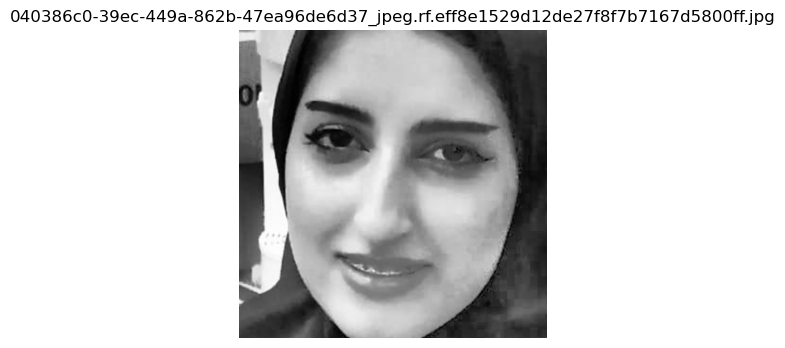

In [19]:
sample = next(SRC_IMG_DIR.glob("*.*"))
img = cv2.imread(str(sample))

print("Original shape:", img.shape)
print("Pixel range:", img.min(), "to", img.max())

# Display
plt.figure(figsize=(4, 4))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(sample.name)
plt.axis("off")


In [20]:
def preprocess_image(img: np.ndarray, size=(640, 640)) -> np.ndarray:
    """
    1) Resize to `size`
    2) Normalize pixels to [0,1]
    3) Convert BGR→RGB
    """
    # Resize
    img_resized = cv2.resize(img, size)
    # Normalize to [0,1]
    img_norm = img_resized.astype(np.float32) / 255.0
    # BGR→RGB
    img_rgb = cv2.cvtColor(img_norm, cv2.COLOR_BGR2RGB)
    return img_rgb


In [21]:
count = 0
for img_path in sorted(SRC_IMG_DIR.glob("*.*")):
    img = cv2.imread(str(img_path))
    if img is None:
        continue

    proc = preprocess_image(img)
    # Convert back to uint8 BGR for YOLO
    out = (proc * 255).astype(np.uint8)
    out_bgr = cv2.cvtColor(out, cv2.COLOR_RGB2BGR)

    # Save
    out_path = DST_IMG_DIR / img_path.name
    cv2.imwrite(str(out_path), out_bgr)
    count += 1

print(f"Processed {count} images → {DST_IMG_DIR}")


Processed 1164 images → ..\data\processed\test\images


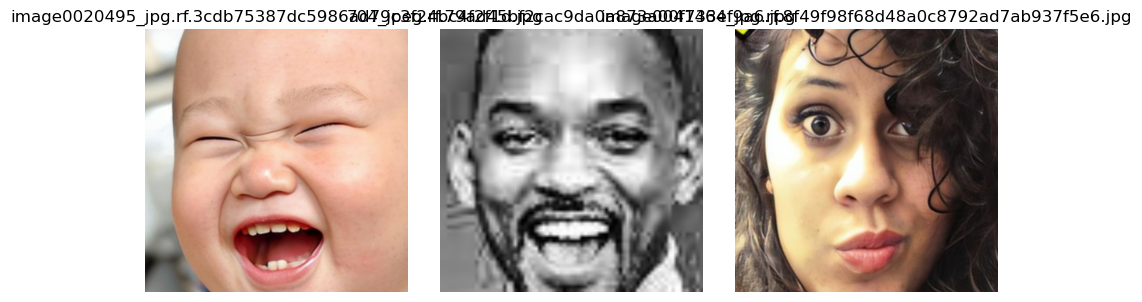

In [22]:
from random import sample

fig, axes = plt.subplots(1, 3, figsize=(9,3))
for ax, img_path in zip(axes, sample(list(DST_IMG_DIR.glob("*.*")), 3)):
    img = cv2.imread(str(img_path))
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_title(img_path.name)
    ax.axis("off")
plt.tight_layout()


In [30]:
from pathlib import Path
from prettytable import PrettyTable

splits = ["train","valid","test"]
table  = PrettyTable(["Split","Interim #","Processed #"])
for split in splits:
    i_dir = Path("../data/interim")   / split / "images"
    p_dir = Path("../data/processed") / split / "images"
    i_count = len(list(i_dir.glob("*.*")))
    p_count = len(list(p_dir.glob("*.*")))
    table.add_row([split, i_count, p_count])
print(table)


+-------+-----------+-------------+
| Split | Interim # | Processed # |
+-------+-----------+-------------+
| train |   44449   |    44449    |
| valid |    1191   |     1191    |
|  test |    1164   |     1164    |
+-------+-----------+-------------+


In [32]:
from pathlib import Path
import cv2

bad = []
for split in ["train","valid","test"]:
    proc_dir = Path("data") / "processed" / split / "images"
    # Now proc_dir is a Path, so .glob works
    for img_path in proc_dir.glob("*.*"):
        img = cv2.imread(str(img_path))
        if img is None or img.shape != (640, 640, 3):
            bad.append(img_path.name)

print("Bad files:", bad[:10] or "None")



Bad files: None


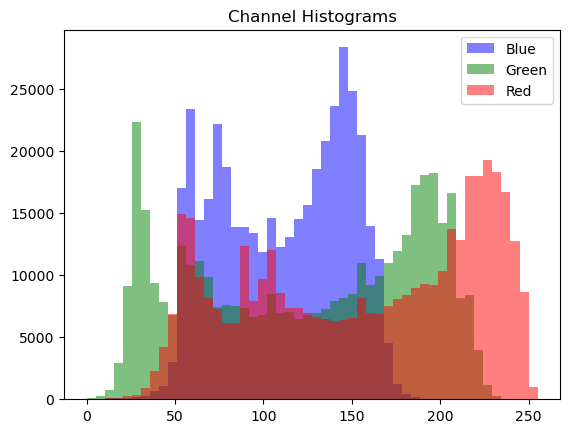

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# pick a random sample
p = np.random.choice(list((DST_IMG_DIR).glob("*.*")))
img = cv2.imread(str(p))
hist = [np.histogram(img[:,:,i].ravel(), bins=50, range=(0,255))[0] for i in range(3)]

plt.hist(img[:,:,0].ravel(), bins=50, range=(0,255),
         color="blue",  alpha=0.5, label="Blue")
plt.hist(img[:,:,1].ravel(), bins=50, range=(0,255),
         color="green", alpha=0.5, label="Green")
plt.hist(img[:,:,2].ravel(), bins=50, range=(0,255),
         color="red",   alpha=0.5, label="Red")

plt.legend()
plt.title("Channel Histograms")
plt.show()

